# Welcome to Covid19 Data Analysis Notebook
------------------------------------------

In [179]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

## Load Covid19 positive casses dataset

In [180]:
corona_dataset_csv = pd.read_csv('./dataset/covid19_Confirmed_dataset.csv')
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


* #### check the shape of the dataframe

In [181]:
corona_dataset_csv.shape

(266, 104)

## Data prepocessing

* #### Delete the useless columns

Because Latitude(Lat) and Longtitude(Long) is not related to our analysis. Hence we remove from the dataset

In [182]:
corona_dataset_csv.drop(['Lat', 'Long'], axis=1, inplace=True)

In [183]:
corona_dataset_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


* #### Aggregating the rows by the country

In [184]:
corona_dataset_aggregated = corona_dataset_csv.groupby('Country/Region').sum()

In [185]:
corona_dataset_aggregated.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


## Data Analysis

* #### Find a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

Covid19 in China

In [186]:
cn_covid = corona_dataset_aggregated.loc['China'][1:]
cn_covid

1/22/20      548
1/23/20      643
1/24/20      920
1/25/20     1406
1/26/20     2075
           ...  
4/26/20    83912
4/27/20    83918
4/28/20    83940
4/29/20    83944
4/30/20    83956
Name: China, Length: 100, dtype: object

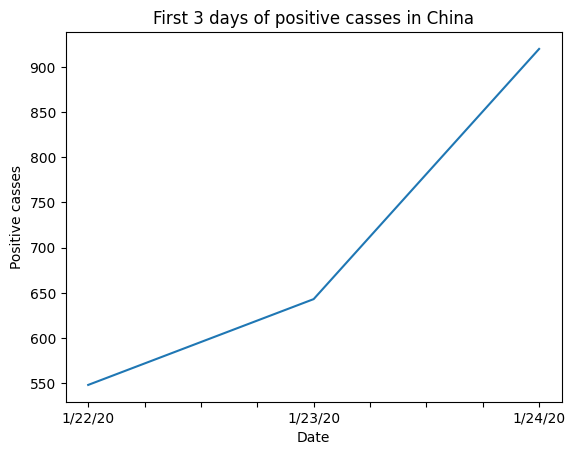

In [187]:
# first 3 days Covid in China
cn_covid[:3].plot()
plt.xlabel('Date')
plt.ylabel('Positive casses')
plt.title('First 3 days of positive casses in China')
plt.show()

* #### Find rate of change of the positive casses in China

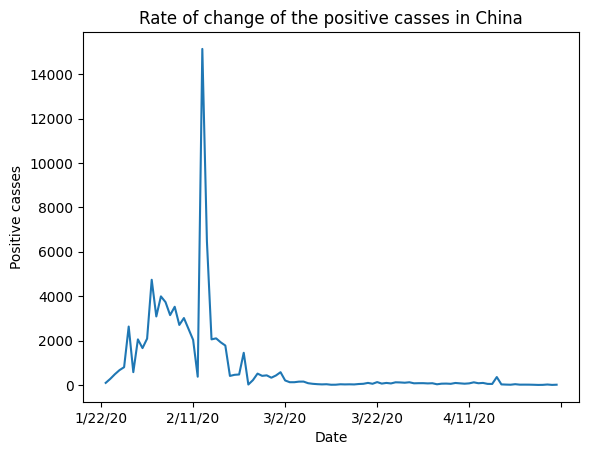

In [188]:
# The change of infection rate day by day in China
cn_covid.diff().plot()
plt.xlabel('Date')
plt.ylabel('Positive casses')
plt.title('Rate of change of the positive casses in China')
plt.show()

* #### Find maxmimum infection rate for China, Italy and Spain

In [189]:
max_infect = cn_covid.max()
print(f'In maximum, it have {max_infect} new positive cases in China in one day.')

In maximum, it have 83956 new positive cases in China in one day.


In [190]:
max_infect = corona_dataset_aggregated.loc['Italy'].diff().max()
print(f'In maximum, it have {max_infect} new positive cases in Italy in one day.')

In maximum, it have 6557 new positive cases in Italy in one day.


In [191]:
max_infect = corona_dataset_aggregated.loc['Spain'].diff().max()
print(f'In maximum, it have {max_infect} new positive cases in Spain in one day.')

In maximum, it have 9630 new positive cases in Spain in one day.


* #### Find maximum infection rate for all of the countries. 

In [192]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for i in countries:
    max_infection_rates.append(corona_dataset_aggregated.loc[i][1:].diff().max())
corona_dataset_aggregated['max_infection_rate'] = max_infection_rates

In [193]:
corona_dataset_aggregated.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5


create a new dataframe with only needed column 

In [194]:
corona_data = pd.DataFrame(corona_dataset_aggregated['max_infection_rate'])

In [195]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232
Albania,34
Algeria,199
Andorra,43
Angola,5


### Load the worldwide happpiness dataset

In [196]:
happiness_report_csv = pd.read_csv('dataset/worldwide_happiness_report.csv')

In [197]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Data cleaning

* #### Drop useless column

because Overall rank, Score, Generosity and Perceptions of corruption cannot find the relationship with maximum infection rate. So remove those column out from dataset

In [198]:
useless_cols = ['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption']

In [199]:
happiness_report_csv.drop(useless_cols, axis=1, inplace=True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


* #### Changing the indices of the dataframe

In [200]:
happiness_report_csv.set_index('Country or region', inplace=True)

In [201]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


###  Join 2 dataset we have prepared 

Corona Dataset

In [202]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232
Albania,34
Algeria,199
Andorra,43
Angola,5


In [203]:
corona_data.shape

(187, 1)

Wolrd happiness report Dataset

In [204]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [205]:
happiness_report_csv.shape

(156, 4)

* Join dataset

In [206]:
# how : which type of join 
data = corona_data.join(happiness_report_csv, how='inner')
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232,0.350,0.517,0.361,0.000
Albania,34,0.947,0.848,0.874,0.383
Algeria,199,1.002,1.160,0.785,0.086
Argentina,291,1.092,1.432,0.881,0.471
Armenia,134,0.850,1.055,0.815,0.283


### Correlation matrix 

In [207]:
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


### Visualization of the results

In [208]:
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232,0.350,0.517,0.361,0.000
Albania,34,0.947,0.848,0.874,0.383
Algeria,199,1.002,1.160,0.785,0.086
Argentina,291,1.092,1.432,0.881,0.471
Armenia,134,0.850,1.055,0.815,0.283


* #### Plotting GDP vs maximum Infection rate

<Axes: xlabel='GDP per capita', ylabel='max_infection_rate'>

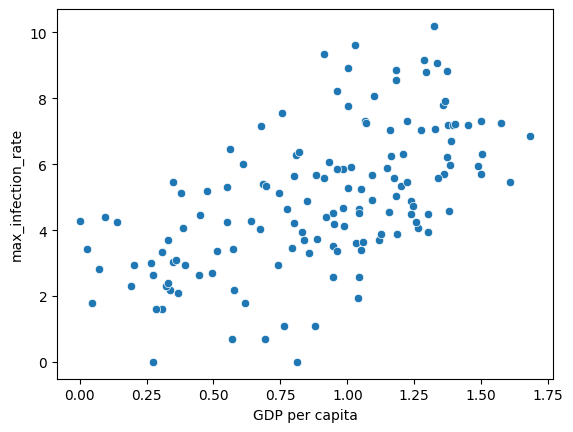

In [209]:
x = data['GDP per capita']
y = data['max_infection_rate']

sns.scatterplot(data=data, x=x, y=np.log(y))# use logarithmic transformation of data

<Axes: xlabel='GDP per capita', ylabel='max_infection_rate'>

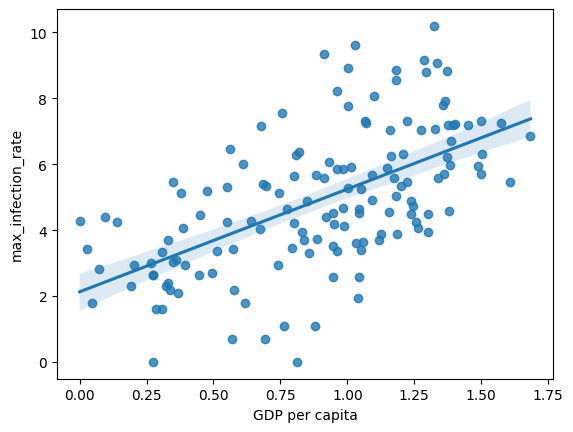

In [210]:
sns.regplot(x=x, y=np.log(y))

* #### Plotting Social support vs maximum Infection rate

<Axes: xlabel='Social support', ylabel='max_infection_rate'>

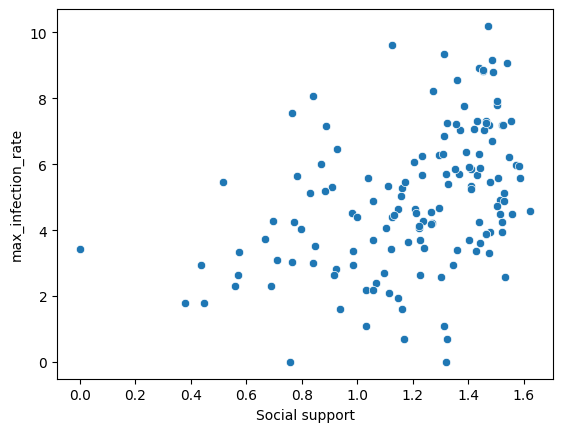

In [211]:
x = data['Social support']
y = data['max_infection_rate']
sns.scatterplot(x=x, y=np.log(y))

<Axes: xlabel='Social support', ylabel='max_infection_rate'>

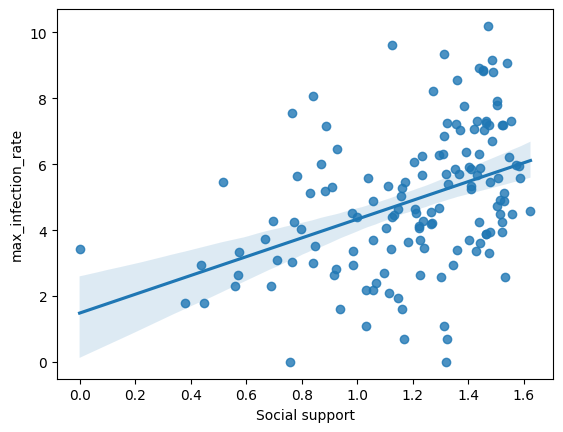

In [212]:
sns.regplot(x=x,y=np.log(y))

* #### Plotting Healthy life expectancy vs maximum Infection rate

<Axes: xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

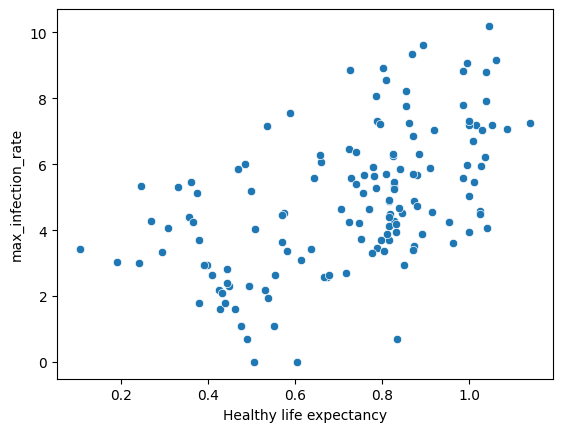

In [213]:
x = data['Healthy life expectancy']
y = data['max_infection_rate']
sns.scatterplot(x=x, y=np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

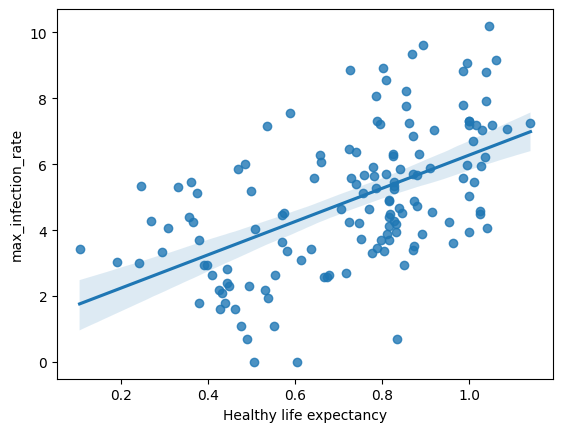

In [214]:
sns.regplot(x=x, y=np.log(y))

* #### Plotting Freedom to make life choices vs maximum Infection rate

<Axes: xlabel='Freedom to make life choices', ylabel='max_infection_rate'>

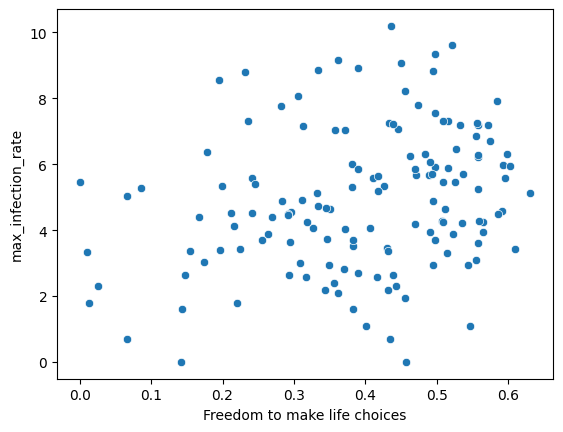

In [215]:
x = data['Freedom to make life choices']
y = data['max_infection_rate']
sns.scatterplot(x=x, y=np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='max_infection_rate'>

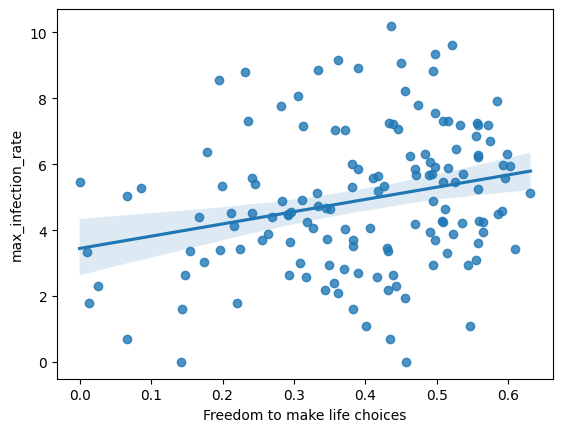

In [216]:
sns.regplot(x=x, y=np.log(y))